# Customer Segmentation
### Data Science Assignment: eCommerce Transactions Dataset
Author: Saniga Babu 
Date:27-01-2025


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load datasets
customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\HP\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")

# Preview data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [26]:
import os
# Set environment variable to avoid memory leak
os.environ["OMP_NUM_THREADS"] = "1"


# Perform KMeans clustering with explicit n_init
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(scaled_data)

# Get cluster labels
labels = kmeans.labels_
print(labels)



c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 2 2 1 0 0 0 1 0 2 0 1 1 2 0 0 1 1 2 0 1 1 0 0 2 0 2 1 2 2 2 2 2 2 2 2 0
 2 1 0 1 0 2 0 1 1 2 0 2 0 1 2 1 1 2 0 1 0 1 2 0 2 2 0 1 0 0 1 0 0 2 2 2 0
 1 0 2 0 0 0 2 1 2 1 0 2 1 2 0 1 2 0 1 2 2 1 2 0 1 0 1 1 0 1 1 2 0 1 1 2 2
 2 1 1 0 0 0 0 2 0 2 1 0 1 0 0 0 0 2 0 0 2 0 2 0 1 0 1 0 0 1 2 1 2 1 0 2 1
 1 0 2 0 1 0 1 1 2 0 2 2 2 1 1 0 1 2 0 0 1 1 1 2 1 2 1 2 2 2 0 0 1 0 0 0 0
 0 1 2 2 0 0 0 2 1 0 2 2 2 1]


In [17]:
# Merge customer and transaction data on 'CustomerID'
data = pd.merge(customers, transactions, on='CustomerID')

# Preview the merged data
data.head()



,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [18]:
# Create customer profiles by aggregating transaction data
customer_profiles = data.groupby('CustomerID').agg({
    'TotalValue': 'sum', 
    'Quantity': 'sum', 
    'Price': 'mean', 
    'Region': 'first'
}).reset_index()

# Preview the customer profiles
customer_profiles.head()


,CustomerID,TotalValue,Quantity,Price,Region
0,C0001,3354.52,12,278.334000,South America
1,C0002,1862.74,10,208.920000,Asia
2,C0003,2725.38,14,195.707500,South America
3,C0004,5354.88,23,240.636250,South America
4,C0005,2034.24,7,291.603333,Asia


In [19]:
# Normalize the numerical features for clustering
# Drop non-numeric columns (like 'Region') before scaling
numerical_columns = customer_profiles.select_dtypes(include=['float64', 'int64']).columns
scaled_data = scaler.fit_transform(customer_profiles[numerical_columns])

# Preview the scaled data
print(scaled_data[:5])




[[-0.06170143 -0.12203296  0.09467022]
 [-0.87774353 -0.44800021 -0.90401592]
 [-0.40585722  0.20393428 -1.09410928]
 [ 1.03254704  1.67078689 -0.44770193]
 [-0.78392861 -0.93695108  0.28558127]]


In [27]:
# Apply K-Means clustering with a chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

# Preview the customer profiles with clusters
customer_profiles.head()


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,TotalValue,Quantity,Price,Region,Cluster
0,C0001,3354.52,12,278.334000,South America,3
1,C0002,1862.74,10,208.920000,Asia,3
2,C0003,2725.38,14,195.707500,South America,3
3,C0004,5354.88,23,240.636250,South America,2
4,C0005,2034.24,7,291.603333,Asia,4


In [28]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Calculate Silhouette Score
silhouette = silhouette_score(scaled_data, customer_profiles['Cluster'])
print(f'Silhouette Score: {silhouette}')


Davies-Bouldin Index: 0.9183282802588961
Silhouette Score: 0.3353833748488999


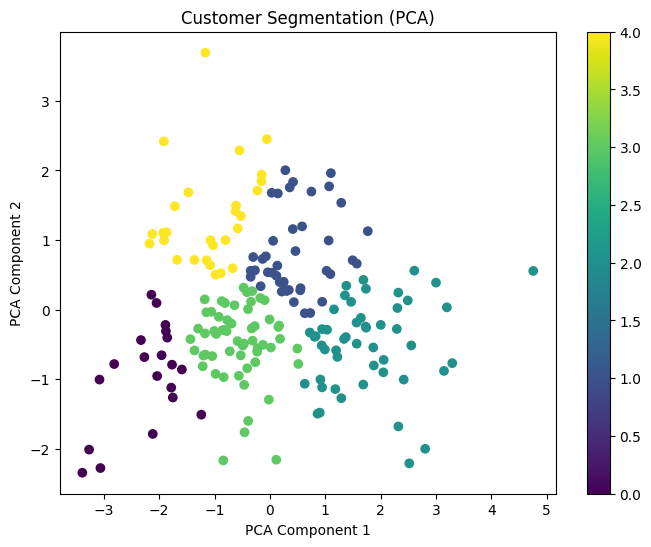

In [29]:
# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_profiles['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
